In [16]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# Defining directories for train and test data
train_data_dir = 'natural_images'  # Directory where training images are stored
test_data_dir = 'data/natural_images'    # Directory where testing images are stored

# Image data preprocessing and augmentation
img_width, img_height = 150, 150  # Resize images to 150x150 pixels
batch_size = 16

# Preprocessing the images: rescale pixel values and augment the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing data

# Load train data from the directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # For binary classification: airplane vs car
)

# Load test data from the directory
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # For binary classification
)


Found 111 images belonging to 2 classes.
Found 111 images belonging to 2 classes.


In [25]:
# Defining the model's architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Building a simple CNN model
model = Sequential()

# Adding convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers and adding fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary classification output (airplane/car)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Training the model
epochs = 5

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator) // batch_size
)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 772ms/step - accuracy: 0.6122 - loss: 0.8464 - val_accuracy: 0.8198 - val_loss: 0.6560
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 727ms/step - accuracy: 0.6498 - loss: 0.6530 - val_accuracy: 0.9009 - val_loss: 0.4185
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 667ms/step - accuracy: 0.8749 - loss: 0.4008 - val_accuracy: 0.8198 - val_loss: 0.5302
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 666ms/step - accuracy: 0.8494 - loss: 0.5566 - val_accuracy: 0.8919 - val_loss: 0.2594
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 662ms/step - accuracy: 0.9076 - loss: 0.2614 - val_accuracy: 0.9369 - val_loss: 0.1828


In [27]:
# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9098 - loss: 0.2435
Test Accuracy: 0.9369


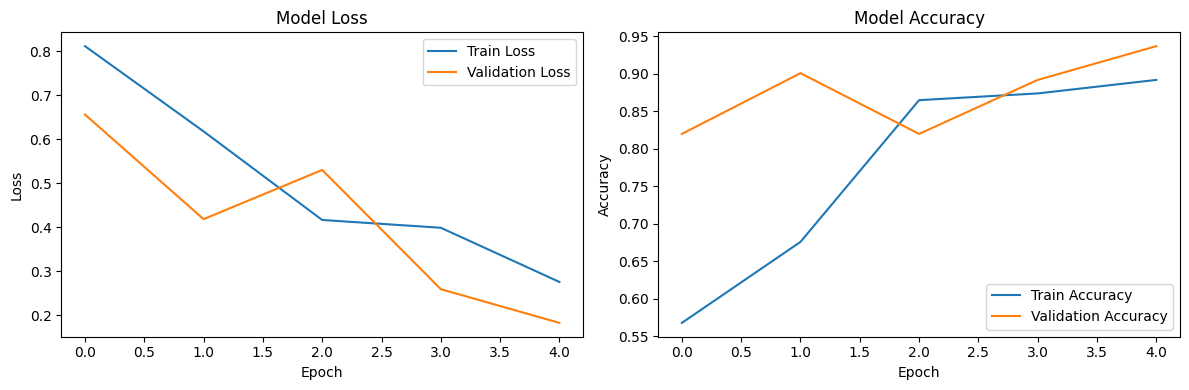

In [28]:
# Plotting training & validation accuracy/loss
import matplotlib.pyplot as plt

# Plotting training & validation loss
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
